In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load Files

In [3]:
sample_1000_length_1e5_rec_2e8=pd.read_csv("../data/sample_1000_length_1e5_rec_2e-8",header=None)
sample_500_length_1e5_rec_2e8=pd.read_csv("../data/sample_500_length_1e5_rec_2e-8",header=None)
sample_100_length_1e5_rec_2e8=pd.read_csv("../data/sample_100_length_1e5_rec_2e-8",header=None)

sample_1000_length_5e4_rec_2e8=pd.read_csv("../data/sample_1000_length_5e4_rec_2e-8",header=None)
sample_500_length_5e4_rec_2e8=pd.read_csv("../data/sample_500_length_5e4_rec_2e-8",header=None)
sample_100_length_5e4_rec_2e8=pd.read_csv("../data/sample_100_length_5e4_rec_2e-8",header=None)

sample_100_length_25e3_rec_2e8=pd.read_csv("../data/sample_100_length_25e3_rec_2e-8",header=None)

# Accuracy of Frequency vs. GEVA

In [4]:
length_1e5_rec_2e8=np.zeros((3,4))

#add the means
length_1e5_rec_2e8[0,0:2]=sample_100_length_1e5_rec_2e8.mean(0)[0:2]
length_1e5_rec_2e8[1,0:2]=sample_500_length_1e5_rec_2e8.mean(0)[0:2]
length_1e5_rec_2e8[2,0:2]=sample_1000_length_1e5_rec_2e8.mean(0)[0:2]

#add the standard deviations
length_1e5_rec_2e8[0,2:4]=sample_100_length_1e5_rec_2e8.std(0)[0:2]
length_1e5_rec_2e8[1,2:4]=sample_500_length_1e5_rec_2e8.std(0)[0:2]
length_1e5_rec_2e8[2,2:4]=sample_1000_length_1e5_rec_2e8.std(0)[0:2]

In [5]:
length_5e4_rec_2e8=np.zeros((3,2))
length_5e4_rec_2e8[0,0]=sample_100_length_5e4_rec_2e8.mean(0)[0]
length_5e4_rec_2e8[0,1]=sample_100_length_5e4_rec_2e8.mean(0)[1]
length_5e4_rec_2e8[1,0]=sample_500_length_5e4_rec_2e8.mean(0)[0]
length_5e4_rec_2e8[1,1]=sample_500_length_5e4_rec_2e8.mean(0)[1]
length_5e4_rec_2e8[2,0]=sample_1000_length_5e4_rec_2e8.mean(0)[0]
length_5e4_rec_2e8[2,1]=sample_1000_length_5e4_rec_2e8.mean(0)[1]

In [6]:
length_25e3_rec_2e8=np.zeros((1,2))
length_25e3_rec_2e8[0,0]=sample_100_length_25e3_rec_2e8.mean(0)[0]
length_25e3_rec_2e8[0,1]=sample_100_length_25e3_rec_2e8.mean(0)[1]

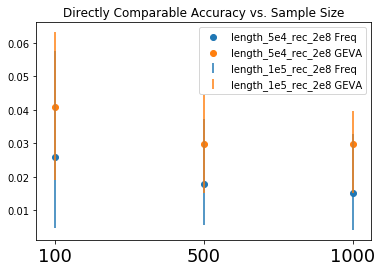

In [7]:
fig, ax = plt.subplots(1,1)
x=[0,1,2]

ax.errorbar(x, length_1e5_rec_2e8[:,0], yerr=2*length_1e5_rec_2e8[:,2], linestyle='',label='length_1e5_rec_2e8 Freq')
#ax.scatter(x,length_1e5_rec_2e8[:,0],label='length_1e5_rec_2e8 Freq')
ax.errorbar(x, length_1e5_rec_2e8[:,1], yerr=2*length_1e5_rec_2e8[:,3], linestyle='',label='length_1e5_rec_2e8 GEVA')
#ax.scatter(x,length_1e5_rec_2e8[:,1],label='length_1e5_rec_2e8 GEVA')

ax.scatter(x,length_5e4_rec_2e8[:,0],label='length_5e4_rec_2e8 Freq')
ax.scatter(x,length_5e4_rec_2e8[:,1],label='length_5e4_rec_2e8 GEVA')

#ax.scatter([0],length_25e3_rec_2e8[:,0],label='length_25e3_rec_2e8 Freq')
#ax.scatter([0],length_25e3_rec_2e8[:,1],label='length_25e3_rec_2e8 GEVA')

x_ticks_labels = ['100','500','1000']

# Set number of ticks for x-axis
ax.set_xticks(x)
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=18)
ax.set_title("Directly Comparable Accuracy vs. Sample Size")
ax.legend()
plt.savefig("Directly Comparable Accuracy vs Sample Size")

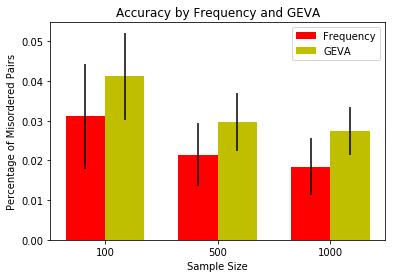

In [8]:
"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""

N = 3
freq_means = length_1e5_rec_2e8[:,0]
freq_std = length_1e5_rec_2e8[:,2]

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, freq_means, width, color='r', yerr=freq_std)

geva_means = length_1e5_rec_2e8[:,1]
geva_std = length_1e5_rec_2e8[:,3]
rects2 = ax.bar(ind + width, geva_means, width, color='y', yerr=geva_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Percentage of Misordered Pairs')
ax.set_title('Accuracy by Frequency and GEVA')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('100', '500', '1000'))
ax.set_xlabel("Sample Size")

ax.legend((rects1[0], rects2[0]), ('Frequency', 'GEVA'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)
plt.savefig("Bar Plot Accuracy by Frequency and GEVA")
plt.show()


In [9]:
length_1e5_rec_2e8

array([[0.0311076 , 0.04115634, 0.01318467, 0.01100291],
       [0.02146227, 0.02976022, 0.0078419 , 0.00732775],
       [0.01844128, 0.02738279, 0.00712563, 0.00614444]])

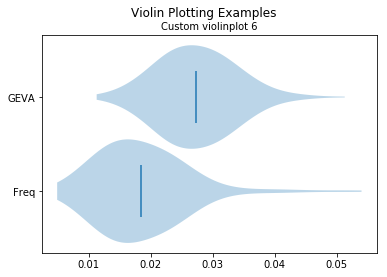

In [10]:
fig, ax = plt.subplots()

ax.violinplot(sample_1000_length_1e5_rec_2e8.iloc[:,0:2].values, [0,1], points=200, vert=False, widths=1.1,
                      showmeans=True, showextrema=False, showmedians=False,
                      bw_method=0.5)
# ax.violinplot(sample_500_length_1e5_rec_2e8.iloc[:,0:2].values, [0,1], points=200, vert=False, widths=1.1,
#                       showmeans=True, showextrema=False, showmedians=True,
#                       bw_method=0.5)
# ax.violinplot(sample_100_length_1e5_rec_2e8.iloc[:,0:2].values, [0,1], points=200, vert=False, widths=1.1,
#                       showmeans=True, showextrema=False, showmedians=True,
#                       bw_method=0.5)
ax.set_title('Custom violinplot 6', fontsize=10)
ax.set_yticks([0,1])
ax.set_yticklabels(('Freq', 'GEVA'))


fig.suptitle("Violin Plotting Examples")
fig.subplots_adjust(hspace=0.4)
plt.show()

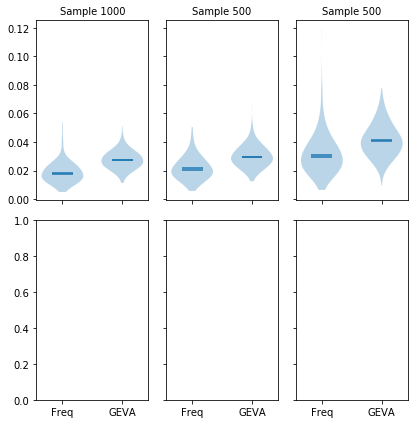

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6),sharex='col', sharey='row')

axes[0,0].violinplot(sample_1000_length_1e5_rec_2e8.iloc[:,0:2].values, [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=True, bw_method=0.5)
axes[0,0].set_title('Sample 1000', fontsize=10)
axes[0,0].set_xticks([0,1])
axes[0,0].set_xticklabels(('Freq', 'GEVA'))

axes[0,1].violinplot(sample_500_length_1e5_rec_2e8.iloc[:,0:2].values, [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=True, bw_method=0.5)
axes[0,1].set_title('Sample 500', fontsize=10)
axes[0,1].set_xticks([0,1])
axes[0,1].set_xticklabels(('Freq', 'GEVA'))

axes[0,2].violinplot(sample_100_length_1e5_rec_2e8.iloc[:,0:2].values, [0,1], points=60, widths=0.7, showmeans=True,
                      showextrema=False, showmedians=True, bw_method=0.5)
axes[0,2].set_title('Sample 500', fontsize=10)
axes[0,2].set_xticks([0,1])
axes[0,2].set_xticklabels(('Freq', 'GEVA'))

fig.subplots_adjust(hspace=0.4)
fig.tight_layout()
plt.show()



# Plot Average Distance Separating Mutations

In [ ]:
length_1e5_rec_2e8=np.zeros((3,2))
length_1e5_rec_2e8[0,0]=sample_100_length_1e5_rec_2e8.mean(0)[0]
length_1e5_rec_2e8[0,1]=sample_100_length_1e5_rec_2e8.mean(0)[1]
length_1e5_rec_2e8[1,0]=sample_500_length_1e5_rec_2e8.mean(0)[0]
length_1e5_rec_2e8[1,1]=sample_500_length_1e5_rec_2e8.mean(0)[1]
length_1e5_rec_2e8[2,0]=sample_1000_length_1e5_rec_2e8.mean(0)[0]
length_1e5_rec_2e8[2,1]=sample_1000_length_1e5_rec_2e8.mean(0)[1]